<h2> KDD PROJECT </h2>
<h3>Injury (Fatal, Non-Fatal, other) in USA attacks (by state, region, overall) by binned time of attack</h3> 
<h4>Team Members:<h4>
    
1. Balasundaram Avudai Nayagam
    
2. Uma Sai Madhuri Jetty

3. Sidharth Panda

4. Ramachandra Gopal Posina

### Importing the libraries and reading the dataset

In [44]:
# Importing the libraries and reading the dataset
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import random
from collections import Counter
import warnings; warnings.simplefilter('ignore')
test = pd.read_csv("testt.csv")

<h3>FILTERING DATA HAVING INJURIES ONLY IN USA AND YEAR AFTER 1999</h3>

In [45]:
#Creating a dataframe containing Area, Loaction, Time and Attack type in USA. 
test1 = test.loc[test['Country']=='USA',['Area','Location','Fatal (Y/N)','Time']]
test2 = test1.loc[test['Year']>=2000,:]
#print(test1)

#test1.shape
#test2.describe()
#test2.info()
#test2.isnull()



<h3>Displaying the first 5 records of the dataset</h3>

In [46]:
test2.head()

,Area,Location,Fatal (Y/N),Time
15,Hawaii,La'aloa Beach Park,N,Morning
23,Florida,"Playalinda Beach, Brevard County",N,Afternoon
24,Florida,"Palm Beach, Palm Beach County",N,11h00
25,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",N,NaN
27,Florida,"Paradise Beach, Melbourne, Brevard County",NaN,11h00


<h2>Pre-Processing the dataset</h2>
<h3>Cleaning the Fatal(Y/N) column by evaluating Location column</h3>

In [47]:
up=test["Injury"].str.upper()


test2["Indexes"]= up.str.contains('FATAL','DEATH')


if test2['Indexes'] is True:
        test2['Fatal (Y/N)']='Y'
else:
        test2['Fatal (Y/N)']='N'
        

In [48]:
test_final=test2[['Area','Location','Fatal (Y/N)','Time']]

<h4> Assigning the result data to a new Dataframe</h4>

In [49]:
test_final

,Area,Location,Fatal (Y/N),Time
15,Hawaii,La'aloa Beach Park,N,Morning
23,Florida,"Playalinda Beach, Brevard County",N,Afternoon
24,Florida,"Palm Beach, Palm Beach County",N,11h00
25,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",N,NaN
27,Florida,"Paradise Beach, Melbourne, Brevard County",N,11h00
28,Hawaii,"Kehena Beach, Hawaii",N,11h00
29,Florida,"Cocoa Beach, Brevard County",N,14h00
32,Hawaii,"Malaka, Oahu",N,14h50
34,Florida,"Playalinda Beach, Brevard County",N,14h30
35,Florida,"Deerfield Beach, Broward County",N,13h50


In [50]:
test_final=test_final.dropna()
test_final

,Area,Location,Fatal (Y/N),Time
15,Hawaii,La'aloa Beach Park,N,Morning
23,Florida,"Playalinda Beach, Brevard County",N,Afternoon
24,Florida,"Palm Beach, Palm Beach County",N,11h00
27,Florida,"Paradise Beach, Melbourne, Brevard County",N,11h00
28,Hawaii,"Kehena Beach, Hawaii",N,11h00
29,Florida,"Cocoa Beach, Brevard County",N,14h00
32,Hawaii,"Malaka, Oahu",N,14h50
34,Florida,"Playalinda Beach, Brevard County",N,14h30
35,Florida,"Deerfield Beach, Broward County",N,13h50
37,Hawaii,"Waikiki,",N,19h20


<h2> Binning</h2>

<h3>Categorizing the Time for binning:</h3>
<h5>Morning: 8-12 <br>
Afternoom: 12-4 <br>
Evening: 4-8<br>
Night: After 8 </h5>

In [51]:
def categories(x):
    if "morning" in str(x).lower() or "dawn" in str(x).lower():
        x = str(random.randrange(600,1190,10))
    elif "afternoon" in str(x).lower() or "noon" in str(x).lower() or "am" in str(x).lower() or "a.m." in str(x).lower() or "day" in str(x).lower() or "time" in str(x).lower():
        x = str(random.randrange(1200,1790,10))
    elif "evening" in str(x).lower() or "dusk" in str(x).lower() or "p.m." in str(x).lower() or "sun" in str(x).lower():
        x = str(random.randrange(1800,2390,10))
    elif "night" in str(x).lower():
        x = str(random.randrange(0,590,10))
    x = re.sub('[^0-9]','', str(x))
    if len(x)<4:
        x = "0"+str(x)
    if len(x)>4:
        x = str(x)[:4]
    x = x.replace('h', '')
    return x


In [52]:
#Function to separate time into five discrete segments: Morning, Afternoon, Evening, Night and Early Morning
def bins(x):
    if int(x) >= 800 and int(x)<1200:
        x = "Morning"
    elif int(x) >= 1200 and int(x)<1600:
        x = "Afternoon"
    elif int(x) >= 1600 and int(x)<2000:
        x = "Evening"
    elif (int(x) >= 2000 and int(x)<2390) or (int(x) >= 0 and int(x)<400):
        x = "Night"
    elif int(x) >= 400 and int(x)<800:
        x = "Early morning"
    return x

In [53]:
test_final.Time=test_final.Time.apply(categories)

In [54]:
test_final.Time = test_final.Time.apply(bins)

In [55]:
test_final

,Area,Location,Fatal (Y/N),Time
15,Hawaii,La'aloa Beach Park,N,Early morning
23,Florida,"Playalinda Beach, Brevard County",N,Afternoon
24,Florida,"Palm Beach, Palm Beach County",N,Morning
27,Florida,"Paradise Beach, Melbourne, Brevard County",N,Morning
28,Hawaii,"Kehena Beach, Hawaii",N,Morning
29,Florida,"Cocoa Beach, Brevard County",N,Afternoon
32,Hawaii,"Malaka, Oahu",N,Afternoon
34,Florida,"Playalinda Beach, Brevard County",N,Afternoon
35,Florida,"Deerfield Beach, Broward County",N,Afternoon
37,Hawaii,"Waikiki,",N,Evening


In [56]:
test_final.columns = test_final.columns.str.replace(" ", "")
test_final.columns

Index(['Area', 'Location', 'Fatal(Y/N)', 'Time'], dtype='object')

<h2>Visualization</h2>

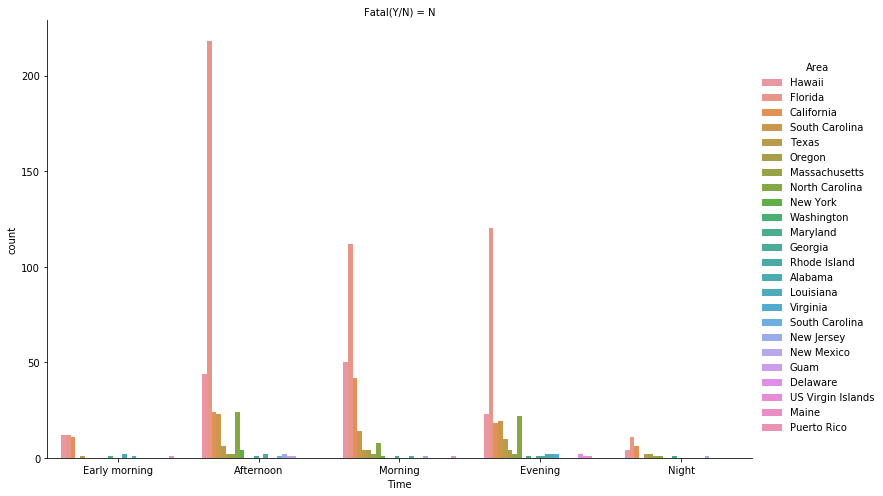

In [57]:
import seaborn as sns #importing seaborn package
sns.catplot(x='Time',col='Fatal(Y/N)',hue='Area',data=test_final,kind='count',height=7,aspect=1.5)
plt.show()


We can observe that maximum number of Attacks occured were Non-fatal and they have occured in the afternoon and mostly of them happened in Florida.

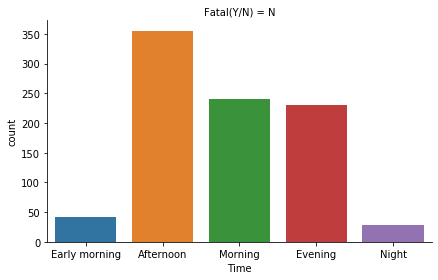

In [65]:
sns.catplot(x='Time',col='Fatal(Y/N)',data=test_final,kind='count',height=4,aspect=1.5)
plt.show()

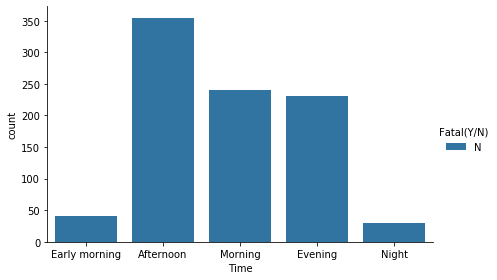

In [59]:
sns.catplot(x='Time',hue='Fatal(Y/N)',data=test_final,kind='count',height=4,aspect=1.5)
plt.show()

As the analyzed data only has Fatal values 'N', the data is plotted for N, the same can be applied for 'Y' values too if exists

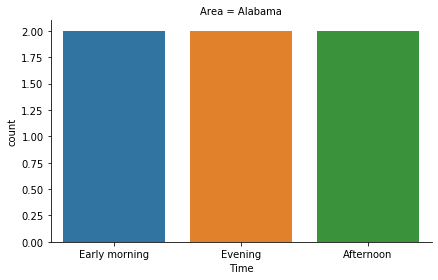

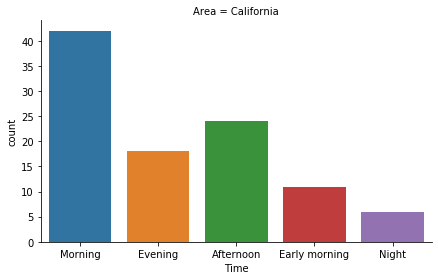

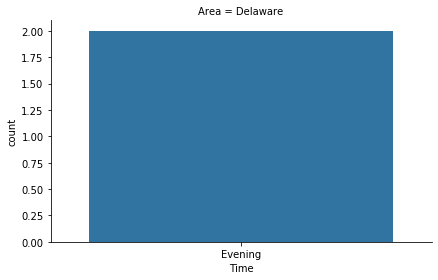

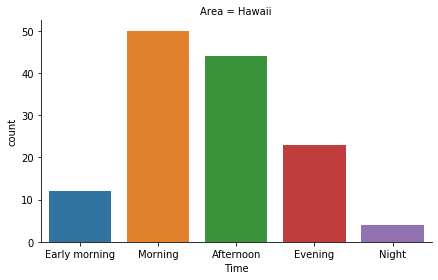

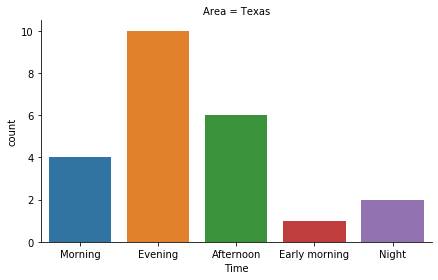

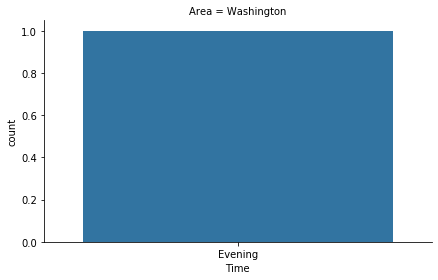

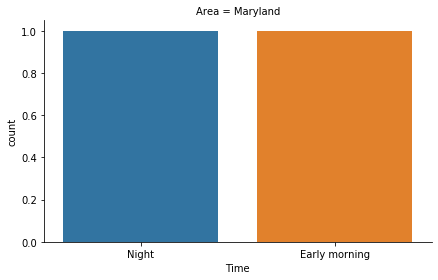

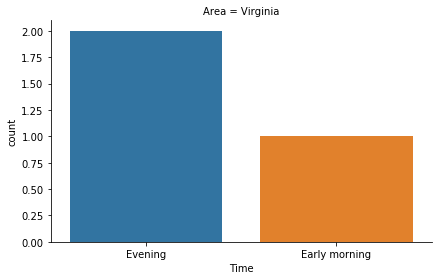

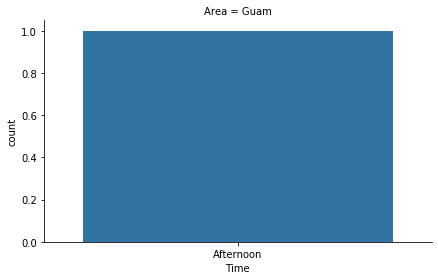

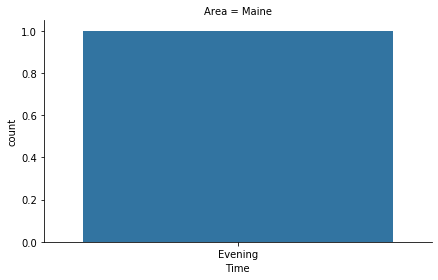

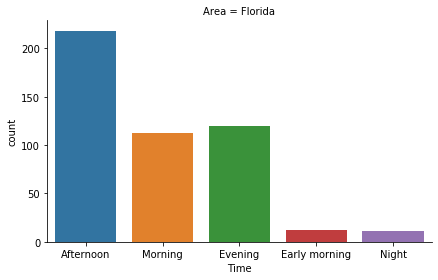

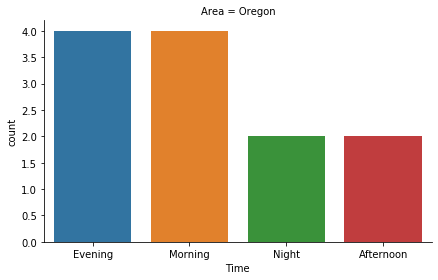

In [74]:
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Alabama'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'California'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Delaware'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Hawaii'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Texas'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Washington'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Maryland'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Virginia'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Guam'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Maine'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Florida'"),kind='count',height=4,aspect=1.5)
sns.catplot(x='Time',col='Area',data=test_final.query("Area == 'Oregon'"),kind='count',height=4,aspect=1.5)


plt.show()

Displays the times and count of attacks for each area

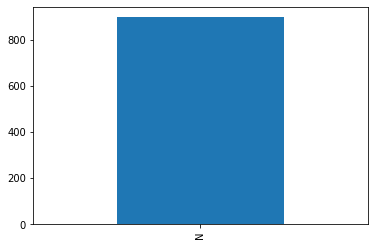

In [61]:
plot_data = test_final['Fatal(Y/N)'].value_counts(sort=False)
plot_data.plot.bar(stacked=False)

Displays count of Non fatal accidents.

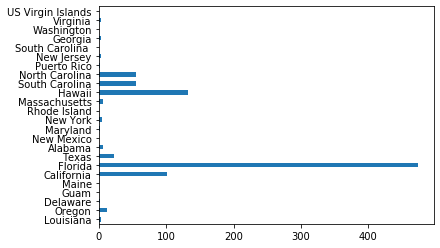

In [62]:
plot_data = test_final['Area'].value_counts(sort=False)
plot_data.plot.barh(stacked=False)

Displays the count of accidents occured in each area of USA.